In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from etna.datasets import TSDataset
from etna.transforms import LagTransform
from etna.models import CatBoostMultiSegmentModel
from etna.pipeline import Pipeline
from etna.models import LinearPerSegmentModel
from etna.metrics import SMAPE, MAPE

In [142]:
data = pd.read_csv('/home/lelikovam/dev/price_predict/prediction_house_price/data/processed/msk_segment.csv', index_col=0)
data.head()

,segment,target,data
0,k=3_t=11_r=1,4704280.0,2018-3
1,k=4_t=1_r=2,8000000.0,2018-3
2,k=16_t=1_r=1,11500000.0,2018-4
3,k=6_t=1_r=3,11500000.0,2018-4
4,k=8_t=1_r=2,10200000.0,2018-4


In [143]:
!pwd

/home/lelikovam/dev/price_predict/prediction_house_price


In [144]:
def rename_field(df : pd.DataFrame):
    df['timestamp'] = pd.to_datetime(df['data'])
    df.drop('data', axis=1, inplace=True)
    return df

In [145]:
data = rename_field(data.copy())

In [146]:
data_etna = TSDataset.to_dataset(data)
data_etna.head(5)

segment,k=0_t=11_r=1,k=0_t=11_r=2,k=0_t=11_r=3,k=0_t=11_r=4,k=0_t=1_r=1,k=0_t=1_r=2,k=0_t=1_r=3,k=0_t=1_r=4,k=10_t=11_r=1,k=10_t=11_r=2,...,k=8_t=1_r=3,k=8_t=1_r=4,k=9_t=11_r=1,k=9_t=11_r=2,k=9_t=11_r=3,k=9_t=11_r=4,k=9_t=1_r=1,k=9_t=1_r=2,k=9_t=1_r=3,k=9_t=1_r=4
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
ts = TSDataset(data_etna, freq="MS")

In [148]:
ts.head()

segment,k=0_t=11_r=1,k=0_t=11_r=2,k=0_t=11_r=3,k=0_t=11_r=4,k=0_t=1_r=1,k=0_t=1_r=2,k=0_t=1_r=3,k=0_t=1_r=4,k=10_t=11_r=1,k=10_t=11_r=2,...,k=8_t=1_r=3,k=8_t=1_r=4,k=9_t=11_r=1,k=9_t=11_r=2,k=9_t=11_r=3,k=9_t=11_r=4,k=9_t=1_r=1,k=9_t=1_r=2,k=9_t=1_r=3,k=9_t=1_r=4
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df = ts.to_pandas()

In [150]:
df = df["2018-09-01":]

In [151]:
df.interpolate(inplace=True)

In [152]:
ts = TSDataset(df, freq="MS")

In [153]:
ts.tail(6)

segment,k=0_t=11_r=1,k=0_t=11_r=2,k=0_t=11_r=3,k=0_t=11_r=4,k=0_t=1_r=1,k=0_t=1_r=2,k=0_t=1_r=3,k=0_t=1_r=4,k=10_t=11_r=1,k=10_t=11_r=2,...,k=8_t=1_r=3,k=8_t=1_r=4,k=9_t=11_r=1,k=9_t=11_r=2,k=9_t=11_r=3,k=9_t=11_r=4,k=9_t=1_r=1,k=9_t=1_r=2,k=9_t=1_r=3,k=9_t=1_r=4
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-12-01,8.976921e+06,1.172950e+07,1.593728e+07,21940000.0,8.509070e+06,1.145298e+07,1.367243e+07,1.443458e+07,9.105076e+06,1.115116e+07,...,1.893035e+07,2.162173e+07,1.288601e+07,2.000678e+07,2.669113e+07,24487320.0,1.229285e+07,1.790613e+07,2.495037e+07,2.846378e+07
2021-01-01,8.922337e+06,1.113128e+07,1.525222e+07,21940000.0,7.830349e+06,1.055488e+07,1.377373e+07,1.722861e+07,9.663430e+06,1.301815e+07,...,2.131373e+07,2.345243e+07,1.158053e+07,1.867912e+07,2.199884e+07,28240000.0,1.313222e+07,1.909075e+07,2.503373e+07,2.336429e+07
2021-02-01,9.608128e+06,1.266441e+07,1.715487e+07,21940000.0,8.539226e+06,1.077496e+07,1.390275e+07,1.584909e+07,9.228162e+06,1.191401e+07,...,2.035470e+07,2.578538e+07,1.192273e+07,1.765108e+07,2.444426e+07,32054400.0,1.392826e+07,1.906249e+07,2.426187e+07,3.245760e+07
2021-03-01,9.679242e+06,1.267182e+07,1.683668e+07,22412000.0,8.886508e+06,1.150902e+07,1.373963e+07,1.561746e+07,9.353618e+06,1.233891e+07,...,2.156692e+07,2.321111e+07,1.174843e+07,1.803516e+07,2.694201e+07,30439590.0,1.326285e+07,1.838308e+07,2.497477e+07,2.671947e+07
2021-04-01,1.003675e+07,1.293518e+07,1.677098e+07,24300000.0,9.236311e+06,1.206305e+07,1.508250e+07,1.789200e+07,1.090223e+07,1.332447e+07,...,1.983408e+07,2.259060e+07,1.165314e+07,1.732213e+07,2.509062e+07,32368830.0,1.341840e+07,1.882711e+07,2.569086e+07,3.276429e+07
2021-05-01,1.028189e+07,1.333712e+07,1.661952e+07,24300000.0,1.325000e+07,1.236667e+07,1.315000e+07,1.529500e+07,1.090223e+07,1.448909e+07,...,2.192500e+07,2.259060e+07,9.089038e+06,1.470608e+07,2.128014e+07,32368830.0,1.392500e+07,1.772667e+07,2.372218e+07,3.276429e+07


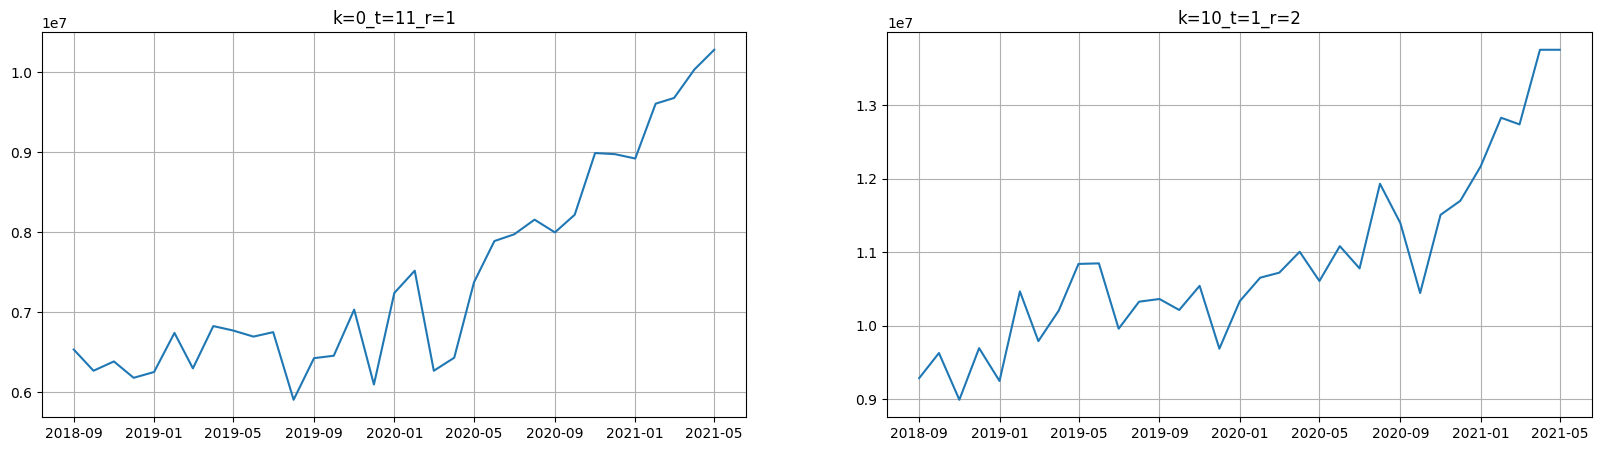

In [154]:

ts.plot(segments=("k=0_t=11_r=1", "k=10_t=1_r=2"))


In [155]:
from etna.transforms import StandardScalerTransform


In [156]:
train_ts, test_ts = ts.train_test_split(
    train_start="2018-09-01",
    train_end="2020-11-01",
    test_start="2020-12-01",
    test_end="2021-05-01",
)

In [157]:
# pd_tarin = train_ts.to_pandas()
# pd_test = test_ts.to_pandas()
# pd_tarin.to_csv('../models/train.csv')
# pd_test.to_csv('../models/test.csv')

In [158]:
from etna.transforms import LagTransform, LogTransform
HORIZON = 6
lags = LagTransform(in_column="target", lags=[6])
#log = LogTransform(in_column="target")
transforms = [lags]
train_ts.fit_transform(transforms)

In [159]:
from etna.models import CatBoostMultiSegmentModel
from etna.models import CatBoostPerSegmentModel
HORIZON = 6
model =  CatBoostMultiSegmentModel()
model.fit(train_ts)
future_ts = train_ts.make_future(future_steps=HORIZON, transforms=transforms)
forecast_ts = model.forecast(future_ts)
forecast_ts.inverse_transform(transforms)

In [160]:
from etna.metrics import SMAPE

smape = MAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'k=0_t=11_r=1': 6.379405498566143,
 'k=0_t=11_r=2': 7.67541809941694,
 'k=0_t=11_r=3': 11.215811486020066,
 'k=0_t=11_r=4': 12.501628186536365,
 'k=0_t=1_r=1': 11.367659194384254,
 'k=0_t=1_r=2': 4.539329844361103,
 'k=0_t=1_r=3': 6.101759273969405,
 'k=0_t=1_r=4': 14.42332604210564,
 'k=10_t=11_r=1': 13.726519565062766,
 'k=10_t=11_r=2': 12.413749181869699,
 'k=10_t=11_r=3': 20.34401858599581,
 'k=10_t=11_r=4': 28.22571271660547,
 'k=10_t=1_r=1': 13.021756858477197,
 'k=10_t=1_r=2': 7.701161378574349,
 'k=10_t=1_r=3': 9.869448936683787,
 'k=10_t=1_r=4': 15.022727388903531,
 'k=11_t=11_r=1': 6.976080539041113,
 'k=11_t=11_r=2': 6.9975990828184305,
 'k=11_t=11_r=3': 8.518680534320017,
 'k=11_t=11_r=4': 12.727055915365563,
 'k=11_t=1_r=1': 7.143614976769036,
 'k=11_t=1_r=2': 11.6459802323452,
 'k=11_t=1_r=3': 8.909445142905449,
 'k=11_t=1_r=4': 19.097550721420554,
 'k=12_t=11_r=1': 6.1921224978008444,
 'k=12_t=11_r=2': 5.285094659648393,
 'k=12_t=11_r=3': 11.277161877478592,
 'k=12_t=11

In [ ]:
from etna.analysis import plot_forecast

train_ts.inverse_transform(transforms)
# plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=24) 

In [162]:
!pwd

/home/lelikovam/dev/price_predict/prediction_house_price


In [161]:
model.save('/home/lelikovam/dev/price_predict/prediction_house_price/models/model_forcasting.sav')

FileNotFoundError: [Errno 2] No such file or directory: '../models/model_forcasting.sav'

In [ ]:
model.load('../models/model_forcasting.sav')

In [ ]:
future_ts = train_ts.make_future(future_steps=HORIZON, transforms=transforms)
forecast_ts = model.forecast(future_ts)
forecast_ts.inverse_transform(transforms)

In [ ]:
smape = MAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

In [ ]:
df = forecast_ts.to_pandas()

In [ ]:
df.columns = pd.MultiIndex.from_product([segment, feature], names=['k=0_t=11_r=1', 'target'])